In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv("FuelConsumptionCo2.csv")


In [3]:
cdf=df[["ENGINESIZE","CO2EMISSIONS"]]


In [4]:
#plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color="blue")


In [5]:
msk=np.random.rand(len(df)) < 0.8
train=cdf[msk]
test=cdf[~msk]

In [6]:
from sklearn.preprocessing  import  PolynomialFeatures
from sklearn import linear_model
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(test[["ENGINESIZE"]])
test_y=np.asanyarray(test[["CO2EMISSIONS"]])


poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(train_x)
#train_x_poly

In [7]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly,train_y)
print("celf",clf.coef_)
print("intercept",clf.intercept_)


celf [[ 0.         49.27790386 -1.4182696 ]]
intercept [109.75326793]


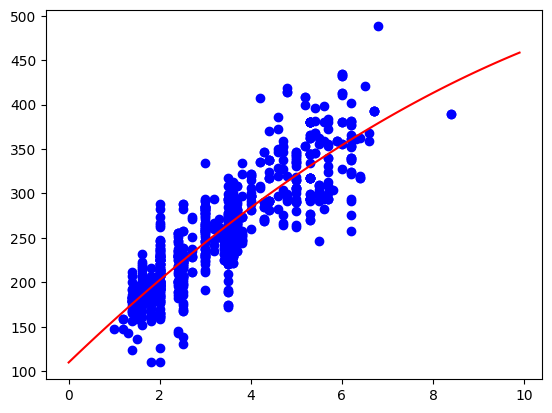

In [8]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color="blue")
xx=np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0] + clf.coef_[0][1] * xx + clf.coef_[0][2] * np.power(xx,2)
plt.plot(xx,yy,"-r")
plt.show()

In [9]:
from sklearn.metrics import r2_score


test_p_x=poly.fit_transform(test_x)
test_y_=clf.predict(test_p_x)

#print("%.2f"%np.mean(np.absolute(test_y_ - test_y)))
#print("%.2f"%np.mean(test_y_ - test_y) ** 2)
print("%.2f"% r2_score(test_y,test_y_ ))

0.77
